In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

In [ ]:
def down_size(infile, width, height, outfile):
    img_array = cv2.imread(infile)
    new_array = cv2.resize(img_array, (width, height), interpolation=cv2.INTER_CUBIC)
    result = cv2.imwrite(outfile, new_array)
    return result

In [ ]:
def prepare_downsizing(infile_folder):
  infile_paths = list(glob.iglob(infile_folder))
  outfile_paths_true = list()
  outfile_paths_false = list()

  for infile_path in infile_paths:
    infile_name = infile_path.split('/')[-1]
    outfile_path = outfile_folder + '/' + infile_name
    result = down_size(infile_path, width, height, outfile_path)
    if result==True:
      outfile_paths_true.append((infile_path, outfile_path))
    else:
      outfile_paths_false.append((infile_path, outfile_path))

  return infile_paths, outfile_paths_true, outfile_paths_false

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# path to Google Drive
google_drive_path = '/content/drive/My Drive/cs109b_final_project/'

Mounted at /content/drive


In [ ]:
width = 256
height = 256

outfile_folder = '/content/drive/My Drive/images_downsized/' + 'images_010'

infile_paths_all = list()
outfile_paths_true_all = list()
outfile_paths_false_all = list()

#image_subfolders = ["images_003", "images_004", "images_005", "images_006", "images_007", "images_008", "images_009", "images_010", "images_011", "images_012"]
image_subfolders = ["images_010"]

start_time = time.time()
for image_subfolder in image_subfolders:
  infile_subfolder = google_drive_path + 'image_data' + '/' + image_subfolder + '/' + '*.png'
  infile_paths_subfolder, outfile_paths_true_subfolder, outfile_paths_false_subfolder = prepare_downsizing(infile_subfolder)
  infile_paths_all.append(infile_paths_subfolder)
  outfile_paths_true_all.append(outfile_paths_true_subfolder)
  outfile_paths_false_all.append(outfile_paths_false_subfolder)

execution_time = (time.time() - start_time)/60.0
print("Training execution time (mins)",execution_time)


Training execution time (mins) 23.109413437048595


In [ ]:
print(len(infile_paths_all))
infile_subfolder_lengths = [len(infile_paths_subfolder) for infile_paths_subfolder in infile_paths_all]
print(infile_subfolder_lengths)

print(len(outfile_paths_true_all))
outfile_subfolder_lengths_true = [len(outfile_paths_subfolder) for outfile_paths_subfolder in outfile_paths_true_all]
print(outfile_subfolder_lengths_true)

print(len(outfile_paths_false_all))
outfile_subfolder_lengths_false = [len(outfile_paths_subfolder) for outfile_paths_subfolder in outfile_paths_false_all]
print(outfile_subfolder_lengths_false)

print(outfile_paths_false_all)

1
[10000]
1
[10000]
1
[0]
[[]]


7121
['/content/drive/My Drive/cs109b_final_project/image_data/images_012/00028173_003.png', '/content/drive/My Drive/cs109b_final_project/image_data/images_012/00028173_004.png', '/content/drive/My Drive/cs109b_final_project/image_data/images_012/00028173_005.png', '/content/drive/My Drive/cs109b_final_project/image_data/images_012/00028173_006.png', '/content/drive/My Drive/cs109b_final_project/image_data/images_012/00028173_007.png', '/content/drive/My Drive/cs109b_final_project/image_data/images_012/00028173_008.png', '/content/drive/My Drive/cs109b_final_project/image_data/images_012/00028173_009.png', '/content/drive/My Drive/cs109b_final_project/image_data/images_012/00028173_010.png', '/content/drive/My Drive/cs109b_final_project/image_data/images_012/00028173_011.png', '/content/drive/My Drive/cs109b_final_project/image_data/images_012/00028173_012.png']
7121
['/content/drive/My Drive/cs109b_final_project/images_downsized/images_012/00028173_003.png', '/content/drive/My Drive/

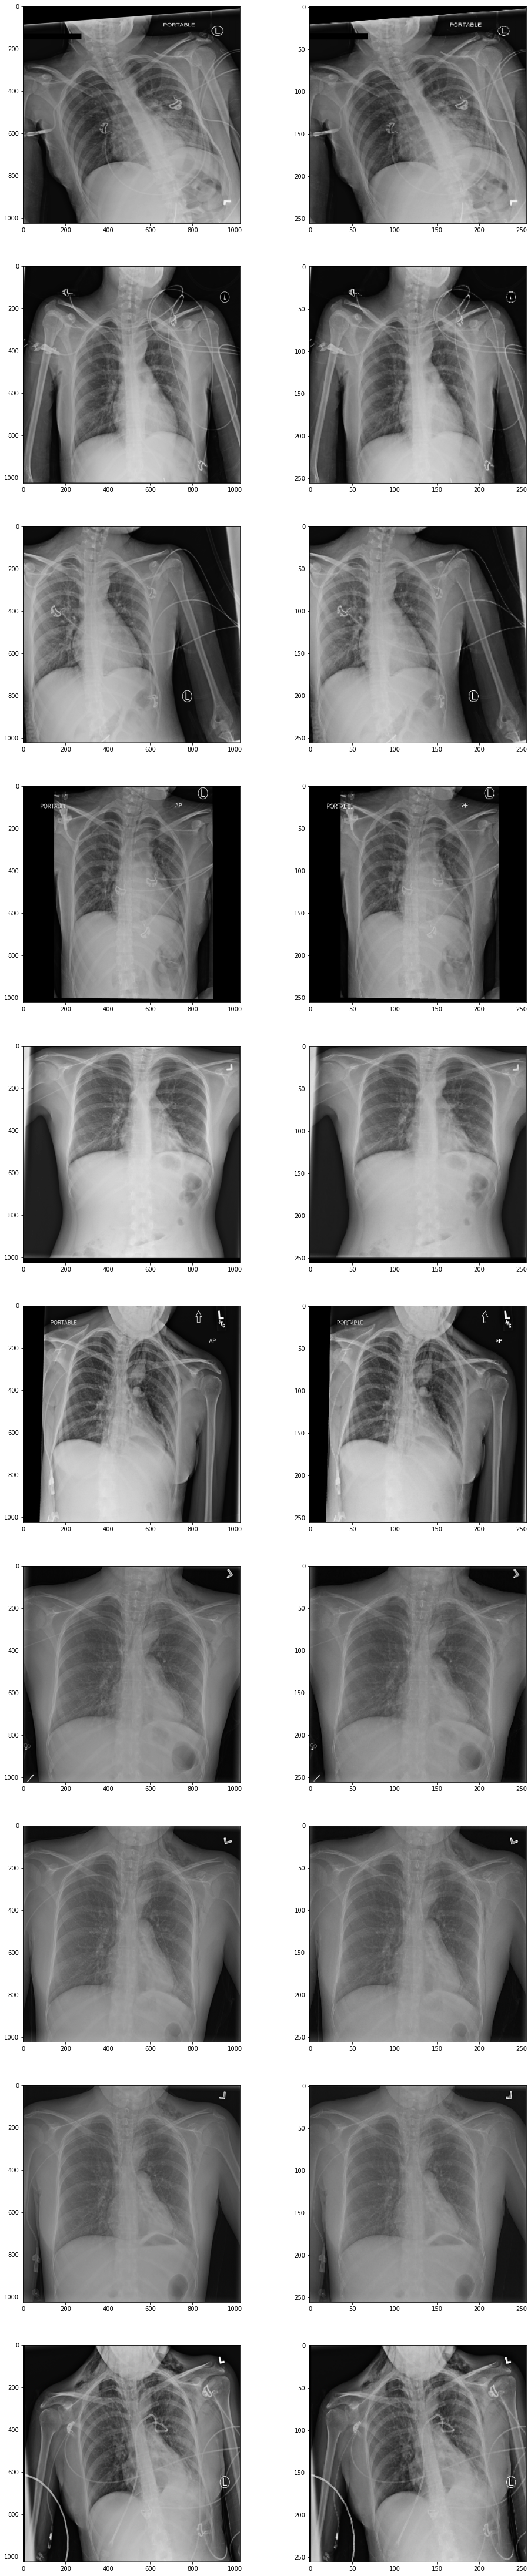

In [17]:
source = list(glob.iglob('/content/drive/My Drive/cs109b_final_project/image_data/' + 'images_012/' + '*.png'))
source.sort()
target = list(glob.iglob('/content/drive/My Drive/cs109b_final_project/images_downsized/' + 'images_012/' + '*.png'))
target.sort()

print(len(source))
print(source[:10])
print(len(target))
print(target[:10])

source_target_list = list(zip(source, target))

fig, axs = plt.subplots(10, 2, figsize=(16,80))

n_rows = 10
images_per_row = 2

for row in range(n_rows):
  for col in range(images_per_row):
    image = plt.imread(source_target_list[row][col])
    axs[row, col].imshow(image, cmap='gray')

